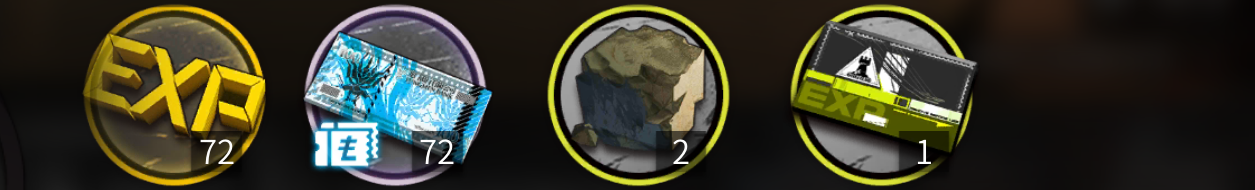

In [86]:
import PIL
from PIL import Image

im=Image.open('screenshot.png')
drop=im.crop((665,785,1920,975))
drop

In [87]:
import os
import cv2 as cv
import numpy as np
exflags=[]

work_dir='./flags'
for parent, dirnames, filenames in os.walk(work_dir,  followlinks=True):
    for filename in filenames:
        fullpath=os.path.join(work_dir,filename)
        img=cv.imread(fullpath,0)
        if img is not None:
            exflags.append(img) # 0,以灰度读取
exflags

[array([[136, 102,  64, ..., 171, 168, 166],
        [124,  78,  47, ..., 172, 173, 171],
        [109,  56,  34, ..., 162, 169, 173],
        ...,
        [125, 122, 118, ...,  78,  75,  73],
        [132, 129, 125, ...,  70,  72,  76],
        [139, 138, 135, ...,  24,  36,  52]], dtype=uint8),
 array([[ 73,  95, 120, ...,  77,  80,  81],
        [ 78, 104, 123, ...,  74,  78,  80],
        [ 95, 102, 106, ...,  72,  76,  78],
        ...,
        [ 68,  68,  66, ...,   7,   8,   4],
        [ 70,  70,  68, ...,  12,  14,  10],
        [ 73,  72,  69, ...,  13,  11,  10]], dtype=uint8),
 array([[ 32,  69, 126, ...,  74,  75,  76],
        [ 75, 116, 157, ...,  72,  73,  74],
        [129, 160, 177, ...,  71,  71,  72],
        ...,
        [100, 182, 210, ...,  56,  55,  58],
        [109, 199, 221, ...,  68,  70,  71],
        [112, 190, 222, ...,  59,  83,  74]], dtype=uint8),
 array([[199, 199, 199, ...,  99,  93,  86],
        [201, 203, 207, ..., 105, 103,  99],
        [197, 20

In [88]:
def match_img(image,target,value):
    #w,h=template.shape[::-1]
    res=cv.matchTemplate(image,target,cv.TM_CCOEFF_NORMED)
    threshold=value
    loc=np.where(res>=threshold)
    ans=[]
    for pt in zip(*loc[::-1]):
        ans.append(pt)
    return ans

In [89]:
from PIL import ImageEnhance,ImageDraw

high=ImageEnhance.Contrast(drop).enhance(100000)
w,h=high.size


breakpoints=[]
black=0
for x in range(0,w):
    r,g,b,alpha=high.getpixel((x,95)) # 物品中线为95
    if r!=0 or g!=0 or b!=0:
        if black>=30:
            breakpoints.append(x)
        black=0
    if r==0 and g==0 and b==0:
        black+=1

for x in range(w-1,0,-1):
    r,g,b,alpha=high.getpixel((x,95)) # 物品中线为95
    if r!=0 or g!=0 or b!=0:
        if black>=30:
            breakpoints.append(x)
        black=0
    if r==0 and g==0 and b==0:
        black+=1

breakpoints.sort()

drops=[]
for i in range(0,len(breakpoints),2):
    temp=drop.crop((breakpoints[i],0,breakpoints[i+1],h))
    
    img=cv.cvtColor(np.asarray(temp),cv.COLOR_RGB2BGR)
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ex=False
    for flag in exflags:
        if len(match_img(img,flag,0.8))>0:ex=True
    if not ex:
        drops.append(temp.convert('L'))
drops

[]

In [90]:
drops[1]

IndexError: list index out of range

In [91]:
# 截取物品识别flag
flags=[]


for i in drops:
    flags.append(i.crop((30,30,100,135)))

In [92]:
flags[0]

IndexError: list index out of range

In [93]:
# 保存flag
import uuid

for i in flags:
    i.save('./flags/'+str(uuid.uuid4())+'.jpg','jpeg')